In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loan Approval Prediction 

- ### Problem Statement : 
    A Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a dataset.

- ### Objective : 
    Build a machine learning model to automate the process of targeting the right applicants.
    
    Identify high-risk borrowers.

## **Import packages and Libraries**

There are some packages for doing descriptive analytics as follows:
- **pandas**: for data manipulation
- **numpy**: for linear algebra calculation
- **matplotlib**: for data visualization
- **seaborn**: for data manipulation
- **plotnine**: for data manipulation

In [3]:
# Dataframe manipulation
import pandas as pd

# Linear algebra
import numpy as np

# Data visualization with plotnine
from plotnine import *
import plotnine

# Data visualization with matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns


# Data partitioning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Grid-search
from sklearn.model_selection import GridSearchCV

# Evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import make_scorer

# XGBoost model
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from lightgbm import LGBMClassifier

# Save the model
import joblib

# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

## **Importing data set**

### Training set

In [8]:
# Import the training set
df_train = pd.read_csv('/Users/chinmay/Desktop/Chinmay/LoanPredictionProject/data/loan_train.csv')
df_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,1
4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [34]:
# Data dimension

print('Data dimension: {} rows and {} columns'.format(len(df_train), len(df_train.columns)))

Data dimension: 614 rows and 13 columns


### Testing data

In [10]:
# Import the testing set
df_test = pd.read_csv('/Users/chinmay/Desktop/Chinmay/LoanPredictionProject/data/loan_test.csv')
df_test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [37]:
# Data dimension
print('Data dimension: {} rows and {} columns'.format(len(df_test), len(df_test.columns)))

Data dimension: 367 rows and 12 columns


## **Data preprocessing**

### Training data

#### Scale measurement

In [43]:
# Data frame metadata

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 62.5+ KB


In [42]:
# Change column types for Credit history and Loan Status

df_train = df_train.astype({'Credit_History': object})

df_train.Loan_Status = df_train["Loan_Status"].replace({'Y':1,'N':0})



In [44]:
# Summary statistics of categorical columns

for i in df_train.select_dtypes('object').columns:
    print(df_train[i].value_counts(),'\n')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64 

Male      489
Female    112
Name: Gender, dtype: int64 

Yes    398
No     213
Name: Married, dtype: int64 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

No     500
Yes     82
Name: Self_Employed, dtype: int64 

1.0    475
0.0     89
Name: Credit_History, dtype: int64 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 



#### Handle missing values

In [45]:
# Check missing values

df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,464,464,LP002305,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,464,2,Male,377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,464,2,Yes,306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,464,4,0,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,464,2,Graduate,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,464,2,No,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,464.0,NaN,NaN,NaN,5278.159483,6094.182225,150.0,2928.5,3859.0,5703.0,81000.0
CoapplicantIncome,464.0,NaN,NaN,NaN,1605.545086,2978.567966,0.0,0.0,1239.5,2253.25,41667.0
LoanAmount,464.0,NaN,NaN,NaN,143.482759,82.647602,17.0,100.0,126.0,161.25,650.0
Loan_Amount_Term,464.0,NaN,NaN,NaN,341.767241,66.324532,12.0,360.0,360.0,360.0,480.0


**Note**: Consideration to remove missing values is based on a business logic. The concept of *garbage in garbage out* applies. Without any relevant domain knowledges of loan problem, the interpolation will lead to the biased result.

Instead of dropping the missing values brutally, we try to inspect the relevant variables in the data in order to suggest the consideration for the next analysis.

##### `Dependents`

In [46]:
print('Number of missing dependents is about {} rows'.format(df_train['Dependents'].isna().sum()))

Number of missing dependents is about 15 rows


In [47]:
# Replace missing valuess with "0"

df_train['Dependents'].fillna(value = '0', inplace = True) 

##### `Self_Employed`

In [48]:
print('Number of missing Self_Employed is about {} rows'.format(df_train['Self_Employed'].isna().sum()))

Number of missing Self_Employed is about 32 rows


In [51]:
# Replace missing values with "No"
df_train['Self_Employed'].fillna(value = 'No', inplace = True) 

##### `Loan_Amount_Term`

In [52]:
df_train[['Loan_Amount_Term', 'Loan_Status']].groupby('Loan_Status').describe()

Loan_Amount_Term                                             \
                       count        mean        std   min    25%    50%   
Loan_Status                                                               
0                      186.0  344.064516  69.238921  36.0  360.0  360.0   
1                      414.0  341.072464  63.247770  12.0  360.0  360.0   

                           
               75%    max  
Loan_Status                
0            360.0  480.0  
1            360.0  480.0

In [53]:
print('Percentile 20th: {}'.format(df_train['Loan_Amount_Term'].quantile(q = 0.2)))

Percentile 20th: 360.0


In [54]:
# Replace missing values with "360"
df_train['Loan_Amount_Term'].fillna(value = 360, inplace = True)

##### `Credit_History`

In [55]:
# Cross tabulation of credit history and loan status
df_cred_hist = pd.crosstab(df_train['Credit_History'], df_train['Loan_Status'], margins = True).reset_index()
# Remove index name
df_cred_hist.columns.name = None
# Remove last row for total column attribute
df_cred_hist = df_cred_hist.drop([len(df_cred_hist) - 1], axis = 0)
df_cred_hist.rename(columns = {'Credit_History':'Credit History', 0:'No', 1:'Yes'}, inplace = True)
df_cred_hist

,Credit History,No,Yes,All
0,0.0,82,7,89
1,1.0,97,378,475


In [56]:
# Slice the data frame based on loan status
pos_cred_hist0 = df_train[(df_train['Credit_History'].isna()) & (df_train['Loan_Status'] == 0)]
pos_cred_hist1 = df_train[(df_train['Credit_History'].isna()) & (df_train['Loan_Status'] == 1)]
print('Number of rows with Loan_Status is No but Credit_History is NaN  : {}'.format(len(pos_cred_hist0)))
print('Number of rows with Loan_Status is Yes but Credit_History is NaN : {}'.format(len(pos_cred_hist1)))

Number of rows with Loan_Status is No but Credit_History is NaN  : 13
Number of rows with Loan_Status is Yes but Credit_History is NaN : 37


In [57]:
# Replace the missing values with a specific condition
credit_loan = zip(df_train['Credit_History'], df_train['Loan_Status'])
df_train['Credit_History'] = [
                                0.0 if np.isnan(credit) and status == 0 else
                                1.0 if np.isnan(credit) and status == 1 else
                                credit for credit, status in credit_loan
                             ]

##### `Gender` and `Loan Amount`

In [58]:
# Drop missing values
df_train.dropna(axis = 0, how = 'any', inplace = True)

In [59]:
# Check missing value
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Testing data

#### Scale measurement

In [60]:
# Data frame metadata
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [61]:
# Change column types
df_test = df_test.astype({'Credit_History': object})
df_test.select_dtypes(include = ['object']).dtypes

Loan_ID           object
Gender            object
Married           object
Dependents        object
Education         object
Self_Employed     object
Credit_History    object
Property_Area     object
dtype: object

In [62]:
# Summary statistics of categorical columns
for i in df_test.select_dtypes('object').columns:
    print(df_test[i].value_counts(),'\n')

LP001015    1
LP002389    1
LP002383    1
LP002376    1
LP002375    1
           ..
LP001627    1
LP001622    1
LP001613    1
LP001611    1
LP002989    1
Name: Loan_ID, Length: 367, dtype: int64 

Male      286
Female     70
Name: Gender, dtype: int64 

Yes    233
No     134
Name: Married, dtype: int64 

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64 

Graduate        283
Not Graduate     84
Name: Education, dtype: int64 

No     307
Yes     37
Name: Self_Employed, dtype: int64 

1.0    279
0.0     59
Name: Credit_History, dtype: int64 

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64 



#### Handle missing values

In [ ]:
# Check missing values
df_test.isna().sum()

Loan_ID              0
Gender               3
Married              2
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           6
Loan_Amount_Term     0
Credit_History       7
Property_Area        0
dtype: int64

##### `Dependents`

In [63]:
print('Number of missing values in Dependents is about {} rows'.format(df_test['Dependents'].isna().sum()))

Number of missing values in Dependents is about 10 rows


In [64]:
# Replace missing values with "0"
df_test['Dependents'].fillna(value = '0', inplace = True)

##### `Self_Employed`

In [65]:
print('Number of missing values in Self_Employed is about {} rows'.format(df_test['Self_Employed'].isna().sum()))

Number of missing values in Self_Employed is about 23 rows


In [66]:
# Replace missing values with "No"
df_test['Self_Employed'].fillna(value = 'No', inplace = True) 

##### `Loan_Amount_Term`

In [67]:
# Replace missing values with "360"
df_test['Loan_Amount_Term'].fillna(value = 360, inplace = True)

##### `Gender`, `Married`, `LoanAmount` and `Credit_History`

In [68]:
# Drop missing values
df_test.dropna(axis = 0, how = 'any', inplace = True)

In [69]:
# Check missing values
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## **Explanatory data analysis**

### The composition of default and not default customers

In [70]:
# Data aggregation between default and not default customers
df_viz_1 = df_train.groupby(['Loan_Status'])['Loan_ID'].count().reset_index(name = 'Total')
# Map the loan status
df_viz_1['Loan_Status'] = df_viz_1['Loan_Status'].map(
    {
        0: 'Not default',
        1: 'Default'
    }
)

In [71]:
# Show the data
df_viz_1

,Loan_Status,Total
0,Not default,176
1,Default,401


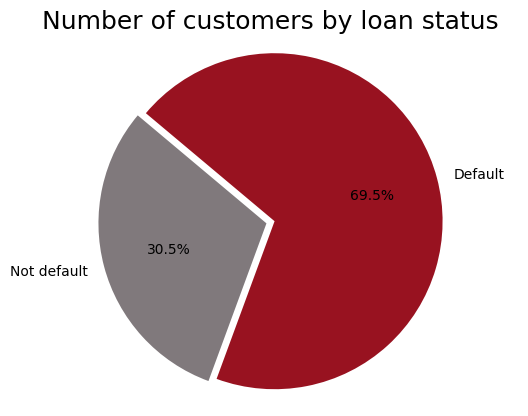

In [72]:
# Figure size
plt.figure(figsize = (6.4,4.8))

# Customize colors and other settings
colors = ['#80797c','#981220']

# Explode 1st slice
explode = (0.05, 0)

# Create a pie chart
plt.pie(
    x = 'Total',
    labels = 'Loan_Status',
    data = df_viz_1,
    explode = explode,
    colors = colors,
    autopct = '%1.1f%%',
    shadow = False,
    startangle = 140
)

# Title and axis
plt.title('Number of customers by loan status', fontsize = 18)
plt.axis('equal')
plt.show()

### The composition of loan status by the dependents

In [73]:
# Data aggregation between loan status and dependents
df_viz_2 = df_train.groupby(['Loan_Status', 'Dependents'])['Loan_ID'].count().reset_index(name = 'Total')
# Map the loan status
df_viz_2['Loan_Status'] = df_viz_2['Loan_Status'].map(
    {
        0: 'Not default',
        1: 'Default'
    }
)

In [74]:
# Show the data
df_viz_2

,Loan_Status,Dependents,Total
0,Not default,0,104
1,Not default,1,35
2,Not default,2,21
3,Not default,3+,16
4,Default,0,234
5,Default,1,62
6,Default,2,75
7,Default,3+,30


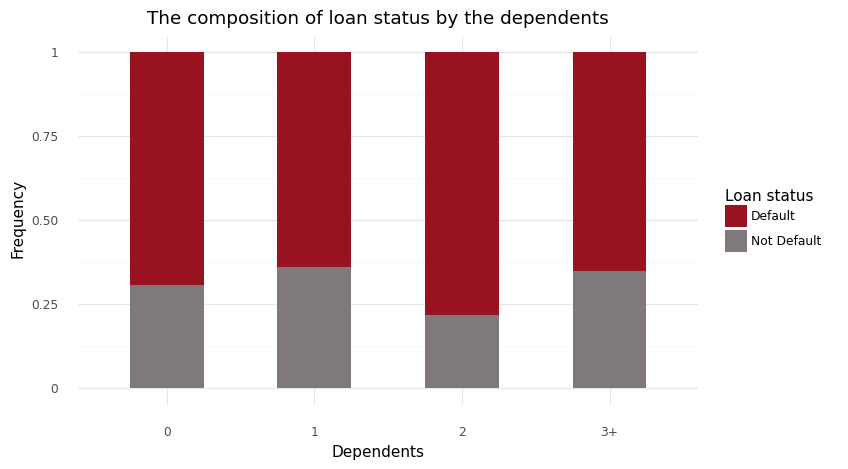

<ggplot: (8737983388862)>

In [75]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(
        data = df_viz_2
    )+
    geom_bar(
        aes(
            x = 'Dependents',
            y = 'Total',
            fill = 'Loan_Status'
        ),
        stat = 'identity',
        position = 'fill',
        width = 0.5
    )+
    labs(
        title = 'The composition of loan status by the dependents',
        fill = 'Loan status'
    )+
    xlab(
        'Dependents'
    )+
    ylab(
        'Frequency'
    )+
    scale_x_discrete(
        limits = ['0', '1', '2', '3+']
    )+
    scale_fill_manual(
        values = ['#981220','#80797c'],
        labels = ['Default', 'Not Default']
    )+
    theme_minimal()
)

### The composition of default customer by the educations

In [76]:
# Data aggregation between loan status and dependents
df_viz_3 = df_train.groupby(['Loan_Status', 'Education'])['Loan_ID'].count().reset_index(name = 'Total')
# Map the loan status
df_viz_3['Loan_Status'] = df_viz_3['Loan_Status'].map(
    {
        0: 'Not default',
        1: 'Default'
    }
)

In [77]:
# Show the data
df_viz_3

,Loan_Status,Education,Total
0,Not default,Graduate,130
1,Not default,Not Graduate,46
2,Default,Graduate,321
3,Default,Not Graduate,80


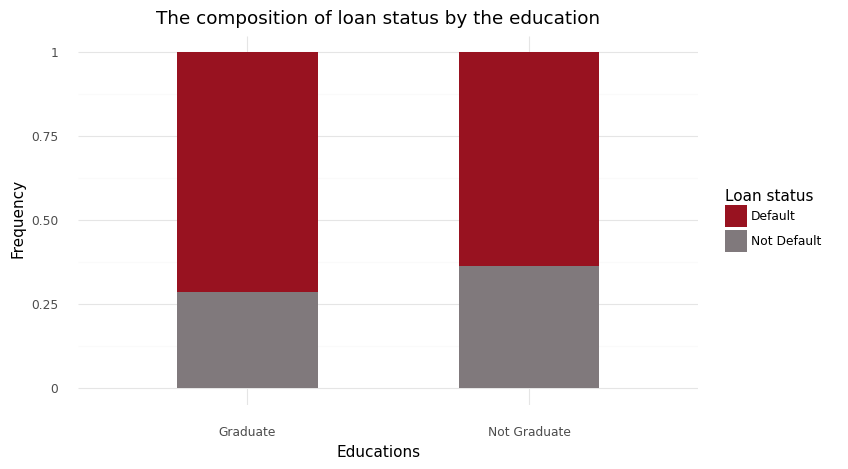

<ggplot: (8737983427425)>

In [78]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(
        data = df_viz_3
    )+
    geom_bar(
        aes(
            x = 'Education',
            y = 'Total',
            fill = 'Loan_Status'
        ),
        stat = 'identity',
        position = 'fill',
        width = 0.5
    )+
    labs(
        title = 'The composition of loan status by the education',
        fill = 'Loan status'
    )+
    xlab(
        'Educations'
    )+
    ylab(
        'Frequency'
    )+
    scale_x_discrete(
        limits = ['Graduate', 'Not Graduate']
    )+
    scale_fill_manual(
        values = ['#981220','#80797c'],
        labels = ['Default', 'Not Default']
    )+
    theme_minimal()
)

### The distribution of applicant incomes by loan status

In [79]:
# Slice the columns
df_viz_4 = df_train[['ApplicantIncome', 'Loan_Status']].reset_index(drop = True)
# Map the loan status
df_viz_4['Loan_Status'] = df_viz_4['Loan_Status'].map(
    {
        0: 'Not default',
        1: 'Default'
    }
)

In [80]:
# Show the data
df_viz_4.head()

,ApplicantIncome,Loan_Status
0,4583,Not default
1,3000,Default
2,2583,Default
3,6000,Default
4,5417,Default


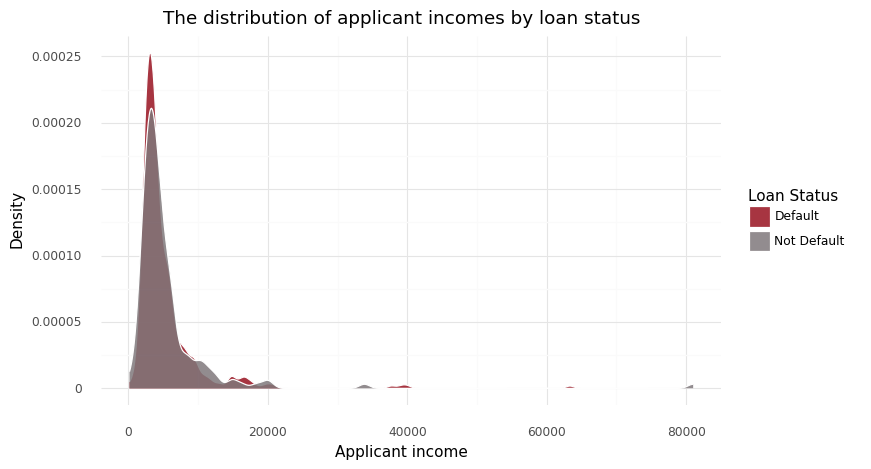

<ggplot: (8737983322881)>

In [81]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(
        data = df_viz_4
    )+
    geom_density(
        aes(
            x = 'ApplicantIncome',
            fill = 'Loan_Status'
        ),
        color = 'white',
        alpha = 0.85
    )+
    labs(
        title = 'The distribution of applicant incomes by loan status'
    )+
    scale_fill_manual(
        name = 'Loan Status',
        values = ['#981220','#80797c'],
        labels = ['Default', 'Not Default']
    )+
    xlab(
        'Applicant income'
    )+
    ylab(
        'Density'
    )+
    theme_minimal()
)

### The distribution of loan amount by loan status

In [82]:
# Slice the columns
df_viz_5 = df_train[['LoanAmount', 'Loan_Status']].reset_index(drop = True)
# Map the loan status
df_viz_5['Loan_Status'] = df_viz_5['Loan_Status'].map(
    {
        0: 'Not default',
        1: 'Default'
    }
)

In [83]:
# Show the data
df_viz_5.head()

,LoanAmount,Loan_Status
0,128.0,Not default
1,66.0,Default
2,120.0,Default
3,141.0,Default
4,267.0,Default


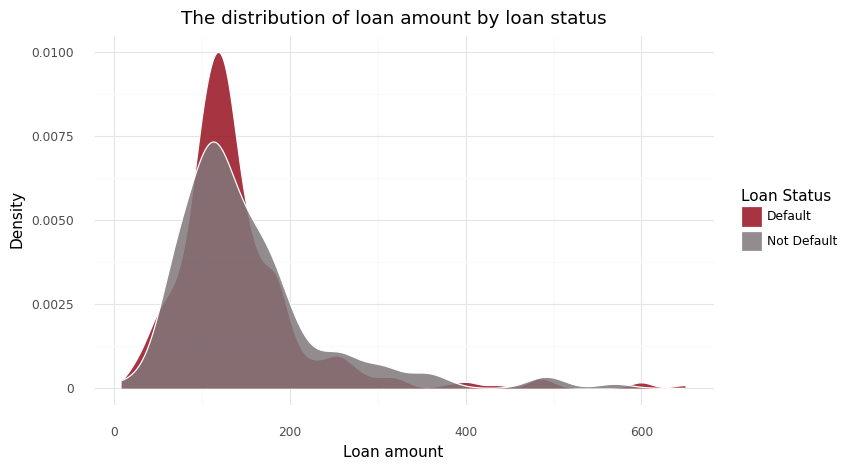

<ggplot: (8737983334160)>

In [84]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(
        data = df_viz_5
    )+
    geom_density(
        aes(
            x = 'LoanAmount',
            fill = 'Loan_Status'
        ),
        color = 'white',
        alpha = 0.85
    )+
    labs(
        title = 'The distribution of loan amount by loan status'
    )+
    scale_fill_manual(
        name = 'Loan Status',
        values = ['#981220','#80797c'],
        labels = ['Default', 'Not Default']
    )+
    xlab(
        'Loan amount'
    )+
    ylab(
        'Density'
    )+
    theme_minimal()
)

### Categorical Variables with respect to Loan Status

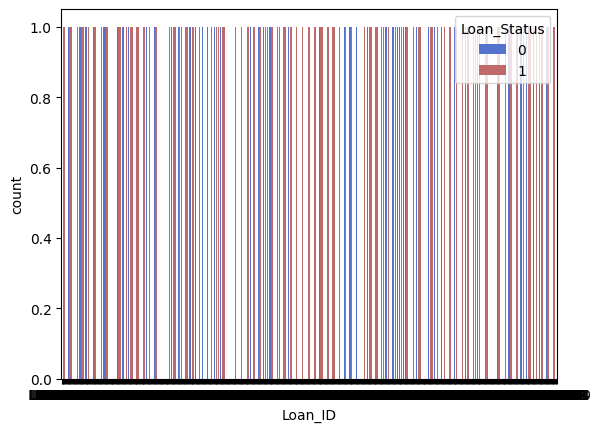

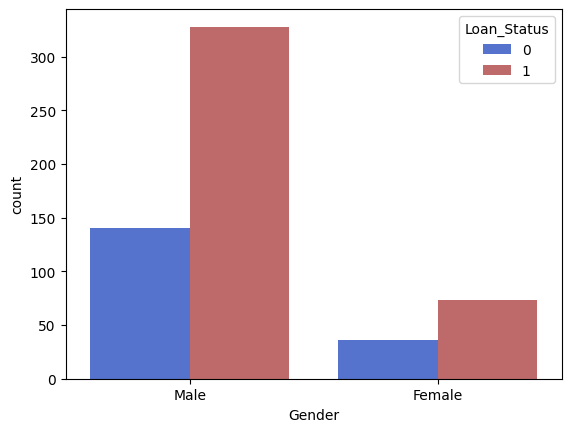

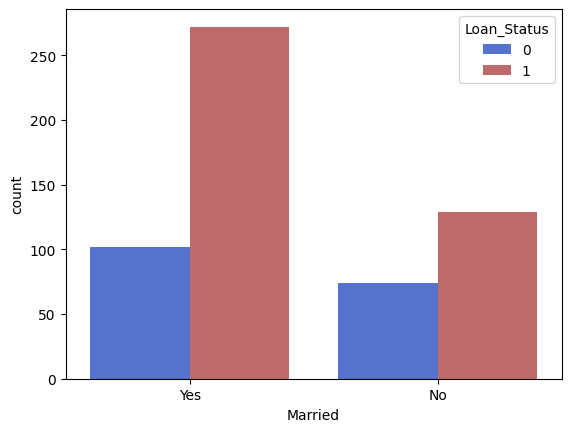

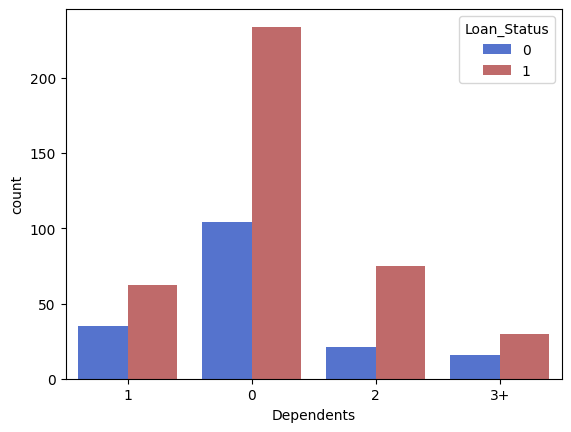

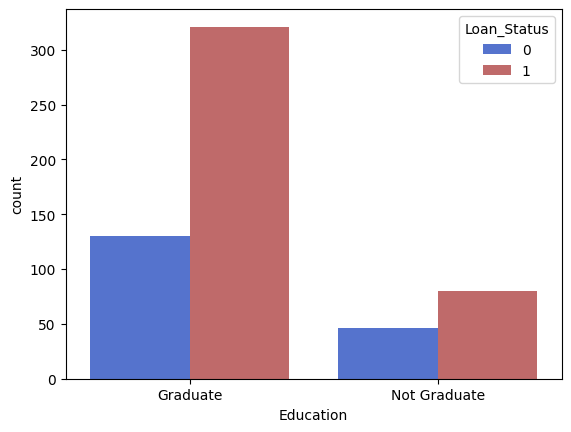

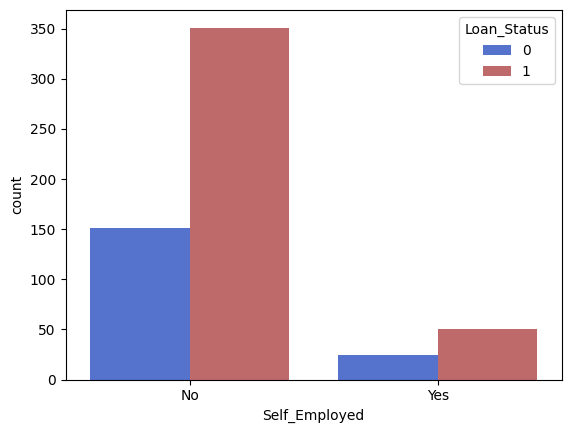

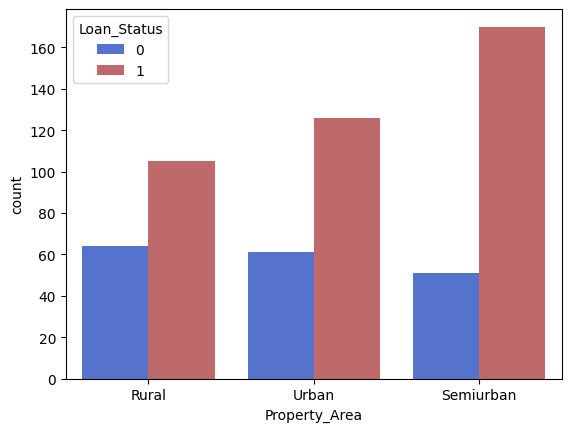

In [88]:
for var in df_train.select_dtypes('object')[1:]:
    sns.countplot(x=var, hue='Loan_Status', data=df_train, palette= ['#4169E1', '#CD5C5C'])
    plt.show()

## **Encoding One-hot**

In [90]:
# Add new column of Loan_Status with 999 in testing data
df_test['Loan_Status'] = 999
# Concat the training and testing data
df_concat = pd.concat(objs = [df_train , df_test], axis = 0)

In [91]:
# Drop the column of Loan_ID
df_concat.drop(columns = ['Loan_ID'], inplace = True)

In [92]:
# Categorical columns
cols_obj_train = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
print(cols_obj_train)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']


In [93]:
# One-hot encoding

df_concat = pd.get_dummies(data = df_concat, columns = cols_obj_train, drop_first = True)
print('Dimension data: {} rows and {} columns'.format(len(df_concat), len(df_concat.columns)))
df_concat.head()

Dimension data: 899 rows and 15 columns


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,0,1,1,1,0,0,0,0,1,0,0
2,3000,0.0,66.0,360.0,1,1,1,0,0,0,0,1,1,0,1
3,2583,2358.0,120.0,360.0,1,1,1,0,0,0,1,0,1,0,1
4,6000,0.0,141.0,360.0,1,1,0,0,0,0,0,0,1,0,1
5,5417,4196.0,267.0,360.0,1,1,1,0,1,0,0,1,1,0,1


## Data partitioning

In [94]:
# Unique values of Loan_Status

df_concat['Loan_Status'].value_counts()

1      401
999    322
0      176
Name: Loan_Status, dtype: int64

In [95]:
# Training set

df_train = df_concat[df_concat['Loan_Status'].isin([0, 1])].reset_index(drop = True)
print('Dimension data: {} rows and {} columns'.format(len(df_train), len(df_train.columns)))
df_train.head()

Dimension data: 577 rows and 15 columns


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,4583,1508.0,128.0,360.0,0,1,1,1,0,0,0,0,1,0,0
1,3000,0.0,66.0,360.0,1,1,1,0,0,0,0,1,1,0,1
2,2583,2358.0,120.0,360.0,1,1,1,0,0,0,1,0,1,0,1
3,6000,0.0,141.0,360.0,1,1,0,0,0,0,0,0,1,0,1
4,5417,4196.0,267.0,360.0,1,1,1,0,1,0,0,1,1,0,1


In [96]:
# Testing set
df_test = df_concat[df_concat['Loan_Status'].isin([999])].reset_index(drop = True)
print('Data dimension: {} rows and {} columns'.format(len(df_test), len(df_test.columns)))
df_test.head()

Data dimension: 322 rows and 15 columns


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,5720,0.0,110.0,360.0,999,1,1,0,0,0,0,0,1,0,1
1,3076,1500.0,126.0,360.0,999,1,1,1,0,0,0,0,1,0,1
2,5000,1800.0,208.0,360.0,999,1,1,0,1,0,0,0,1,0,1
3,3276,0.0,78.0,360.0,999,1,0,0,0,0,1,0,1,0,1
4,2165,3422.0,152.0,360.0,999,1,1,0,0,0,1,1,1,0,1


In [97]:
# Data partitioning >>> training set into training and validation

df_train_final = df_train.reset_index(drop = True)
X = df_train_final[df_train_final.columns[~df_train_final.columns.isin(['Loan_Status'])]]
y = df_train_final['Loan_Status']

# Training = 70% and validation = 30%
X_train, X_val, y_train, y_val = train_test_split(X , y, test_size = 0.3, random_state = 42)
print('Data dimension of training set   :', X_train.shape)
print('Data dimension of validation set :', X_val.shape)

# Testing set
X_test = df_test[df_test.columns[~df_test.columns.isin(['Loan_Status'])]]
print('Data dimension of testing set    :', X_test.shape)

Data dimension of training set   : (403, 14)
Data dimension of validation set : (174, 14)
Data dimension of testing set    : (322, 14)


## Machine learning model development

In [116]:
Models = [KNeighborsClassifier(),RandomForestClassifier(),XGBClassifier(objective = 'binary:logistic',use_label_encoder = False),GaussianNB(),DecisionTreeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),LGBMClassifier()]
model_names : str = ['KNN','Random Forest','XGBoost','Naive Bayes','Decision Tree','ADA Boost','Gradient Boosting','Light GBM']

# Creating List for Accuracy, F1 Score and Time
final_accuracy = []
final_F1 = []
final_time = []
import time
# Looping Each Model for training
for model in Models:
    classifier = model
    start = time.time()
    
    classifier.fit(X_train, y_train)
    y_pred=classifier.predict(X_val)
    
    stop = time.time()
    acc = accuracy_score(y_val,y_pred)
    f1 = f1_score(y_val,y_pred)
    # t = stop - start
    print(f"Model : {model} having Accuracy Score : {acc:.2f} and F1 Score : {f1:.2f} with Time : {stop - start:.2f}")
    print('\n')

    final_accuracy.append(round(classifier.score(X_val,y_val) * 100, 2))
    final_F1.append(round(f1_score(y_val,y_pred) * 100, 2))
    final_time.append(round((stop-start),2))



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.


Model : KNeighborsClassifier() having Accuracy Score : 0.59 and F1 Score : 0.72 with Time : 0.02


Model : RandomForestClassifier() having Accuracy Score : 0.82 and F1 Score : 0.88 with Time : 0.25


Model : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) having Accuracy Score : 0.75 and F1 Scor

In [114]:
data = {'Model Name': model_names,
      'Accuracy': final_accuracy,
      'F1_Score': final_F1,
      'Time': final_time}

score_data = pd.DataFrame(data)

In [115]:
score_data.sort_values(by='Accuracy',ascending=False)

,Model Name,Accuracy,F1_Score,Time
5,ADA Boost,82.76,88.00,0.08
6,Gradient Boosting,82.76,88.19,0.09
1,Random Forest,82.18,87.84,0.14
3,Naive Bayes,82.18,87.84,0.00
7,Light GBM,79.31,85.48,0.03
2,XGBoost,75.29,82.45,0.06
4,Decision Tree,71.84,79.15,0.00
0,KNN,59.20,72.37,0.01


In [104]:
# XGBoost model
xgb_model = xgb.XGBClassifier(
    objective = 'binary:logistic',
    use_label_encoder = False
)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.


In [117]:
grad_model = GradientBoostingClassifier()

In [123]:
# Define parameter range 
params = {
    'eta': np.arange(0.1, 0.26, 0.05),
    'min_child_weight': np.arange(1, 5, 0.5).tolist(),
    'gamma': [5],
    'subsample': np.arange(0.5, 1.0, 0.11).tolist(),
    'colsample_bytree': np.arange(0.5, 1.0, 0.11).tolist()
}

param1 = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [119]:
# Make a scorer from a performance metric or loss function
scorers = {
    'f1_score': make_scorer(f1_score),
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [120]:
# k-fold cross validation
skf = KFold(n_splits = 10, shuffle = True)

In [108]:
# Set up the grid search CV
grid = GridSearchCV(
    estimator = xgb_model,
    param_grid = params,
    scoring = scorers,
    n_jobs = -1,
    cv = skf.split(X_train, np.array(y_train)),
    refit = 'accuracy_score'
)

In [125]:
# Set up the grid search CV
grid = GridSearchCV(
    estimator = grad_model,
    param_grid = param1,
    scoring = scorers,
    n_jobs = -1,
    cv = skf.split(X_train, np.array(y_train)),
    refit = 'accuracy_score'
)

In [109]:
# Fit the model
grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f2785cb3990>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,...
             param_grid={'colsample_bytree': [0.5, 0.61, 0.72, 0.83, 0.94],
                         'eta': array([0.1 , 0.15, 0.2 , 0.25]), 'gamma': [5],
                         'min_child_weight': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0,
                                              4.5],
                         'subsample': [0.5, 0.61, 0.72, 0.83, 0.94]},
             refit='accuracy_score',
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

In [126]:
# Fit the model
grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f2783647060>,
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]},
             refit='accuracy_score',
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

In [127]:
# Best parameters
grid.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}

In [128]:
# Create a prediction of training 
predicted = grid.predict(X_val)

In [129]:
# Model evaluation - training data
accuracy_baseline = accuracy_score(predicted, np.array(y_val))
recall_baseline = recall_score(predicted, np.array(y_val))
precision_baseline = precision_score(predicted, np.array(y_val))
f1_baseline = f1_score(predicted, np.array(y_val))

print('Accuracy for baseline   :{}'.format(round(accuracy_baseline, 5)))
print('Recall for baseline     :{}'.format(round(recall_baseline, 5)))
print('Precision for baseline  :{}'.format(round(precision_baseline, 5)))
print('F1 Score for baseline   :{}'.format(round(f1_baseline, 5)))

Accuracy for baseline   :0.83908
Recall for baseline     :0.8042
Precision for baseline  :1.0
F1 Score for baseline   :0.89147


## Store the ML model

In [ ]:
# Store the model into a pickle file
filename = '../bin/xgboostModel.pkl'
joblib.dump(grid.best_estimator_, filename)

['../bin/xgboostModel.pkl']